<a href="https://colab.research.google.com/github/sejongsmarcle/2023_Spring_Kaggle_Study/blob/main/%5Bkaggle_study%5D_%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8C%80%EC%97%AC%EB%9F%89_%EC%98%88%EC%B8%A1_(%EB%8D%B0%EC%9D%B4%EC%BD%98_%2B_a_ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 준비

- 데이터 분석, 전처리, 모델링에 필요한 라이브러리 불러오기
  - pandas : df를 분석, 조작하기 위해 필요한 라이브러리
  - seaborn : 히트맵, 통계용 차트와 같이 데이터 분석을 시각화하기 위해 필요한 라이브러리
  - matplotlib : 그래프를 그리기위한 라이브러리
  - RandomForestRegressor : 여러 개의 결정 트리를 임의적으로 학습하는 앙상블의 배깅 유형
    - 앙상블 : 여러 가지 우수한 학습 모델을 조합해 예측력을 향상시키는 모델
    - 배깅 : 조금씩 서로 다른 훈련 데이터를 생성하여 모델을 생성하고 결과치를 결합하는 방법

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [ ]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


id 고유 id

hour 시간

temperature 기온

precipitation 비가 오지 않았으면 0, 비가 오면 1

windspeed 풍속(평균)

humidity 습도

visibility 시정(視程), 시계(視界)(특정 기상 
상태에 따른 가시성을 의미)

ozone 오존

pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 
크기의 미세먼지)

pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)

count 시간에 따른 따릉이 대여 수

**각 데이터의 결측치 개수 분석**

In [ ]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

# 2. 데이터 분석

In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


**train.describe()**

*기본적으로 NAN값은 빼고 계산됨*


---


- count : 총 데이터의 값
- mean : 평균 값
- std : 표준편차 값
  - 표준편차가 작을 수록 값들이 평균에 밀집되어 있음


In [ ]:
hour_m = train.groupby('hour').mean()['count']
hour_m

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

**train.groupby()**

*데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도로 데이터를 처리할 때 사용*


---


df.groupby(컬럼) + 통계함수의 형태로 사용


- 주로 사용하는 파라미터
  - count : 데이터의 개수
  - sum : 합계
  - mean : 평균
  - median : 중앙값



시간당 평균 대여량에 대한 그래프

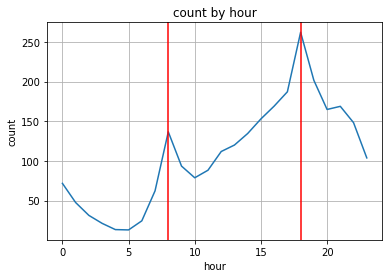

In [ ]:
plt.plot(hour_m)
plt.grid() # 격자

plt.title('count by hour')
plt.xlabel('hour')
plt.ylabel('count')

plt.axvline(8,color ='r') #  특정 격자에 줄 표시
plt.axvline(18,color ='r')

In [ ]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


**train.corr()**

*각 열 간의 상관 계수를 반환하는 메서드*


---


**상관계수 분석하기**

*상관계수(r)은 -1 ~ 1 사이 범위에 존재함*

1. r 이 0에 근접할수록 선형관계는 약해짐
2. 양수 r 값은 양의 상관관계를 나타냄 (두 변수는 함께 증가함)
3. 음수 r 값은 음의 상관관계를 나타냄 (한 변수가 증가하면 다른 한 변수는 감소함) 

**sns.heatmap()**
*히트맵을 사용하기 위한 라이브러리*


---
- 주요 파라미터 
  - annot : 수치 표시
  - annot_kws = {'size':~} : 수치표시 사이즈
  - cmap : 색상변경


<Axes: >

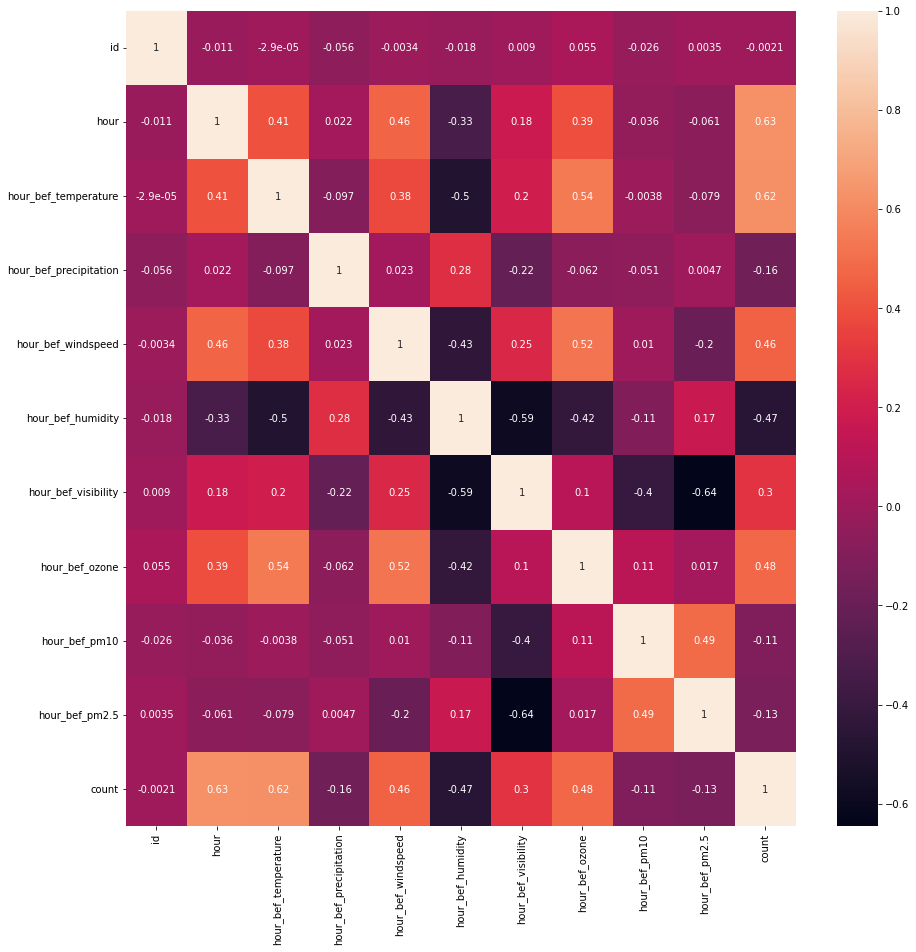

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot = True)

**count와 상관관계가 짙은 것 (0.5 근접 ~ 이상)** 


---


hour,temperture, windspread, humidity, ozone

ozone은 결측치가 많아서 일방 처리

# 3-1. train 데이터 전처리

- 결측치 개수 확인
- 결측치 제외 전체 데이터의 경향성 확인
- 위의 과정을 통해서 결측치에 대한 대처하기



**1. temperature 결측치**

*특이 사항 : 수가 많지 않음*

In [ ]:
# temperature 텍스트 중에서 결측치가 있는 열만 확인

train[train['hour_bef_temperature'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# 결측치를 채우기 위해서 시간당 평균 값 도출

hour_temp=train.groupby('hour').mean()['hour_bef_temperature']
hour_temp

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

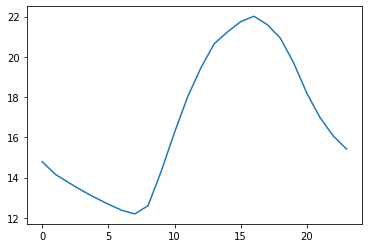

In [ ]:
# 시간당 온도 값에 차이가 많이 남 -> 0이나 평균값 등 하나의 값으로 통일할 수 없음
# 따라서 시간당 평균값을 해당 NaN 값에 넣어서 결측치를 채워줌

plt.plot(hour_temp)

In [ ]:
train['hour_bef_temperature'].fillna({934:14.788136,1035:20.926667},inplace = True)

**train.fillna()**

*결측값을 채우는 역할을 수행*


---
- 여러 값을 한번에 채우기 
  - zero : df[col].fillna(0)
  - mean : df[col].fillna(df[col].mean())
    - median, min, max도 같은 방식으로 채울 수 있음

- 특정 값으로 채우기 
  - df[col].fillna[{a:b,c:d}, inplace = True)
    - 여러값을 한번에 채울 때도 inplace = True 해줘야함

In [ ]:
train.loc[[934, 1035],:]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


**2. Windspread 결측치**

*특이사항 : 결측치 많지 않음 -> 위와 같은 메커니즘으로 진행*

In [ ]:
train[train['hour_bef_windspeed'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


**sns.Implot**

*산점도와 회귀 직선을 동시에 그릴 수 있음*


---

- sns.lmplot(x='a', y='b', data=df) : 기본 형식

https://zephyrus1111.tistory.com/265 : 구체적인 사용 방식 설명


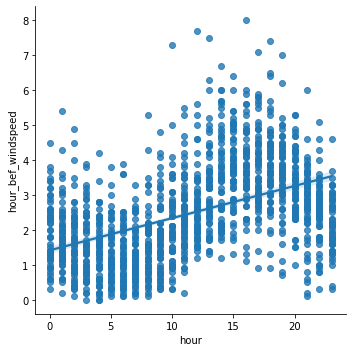

In [ ]:
sns.lmplot(x ='hour', y='hour_bef_windspeed', data = train)

In [ ]:
hour_wind = train.groupby('hour').mean()['hour_bef_windspeed']
hour_wind

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [ ]:
train['hour_bef_windspeed'].fillna({18:3.281356,244:1.836667260,260:1.620000,376:1.965517,780:3.278333,934:1.965517,1035:3.838333,1138:2.766667,1229:1.633333},inplace = True)

In [ ]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

**3. humidity 결측값**

*특이사항 : 결측치 많지 않음 -> 위와 같은 메커니즘으로 진행*

In [ ]:
train[train['hour_bef_humidity'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0


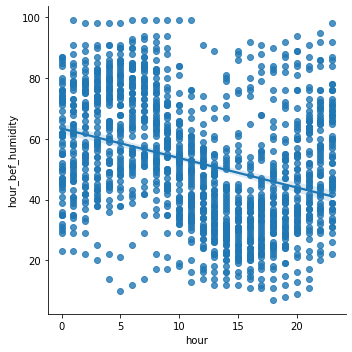

In [ ]:
sns.lmplot(x ='hour', y='hour_bef_humidity', data = train)

In [ ]:
hour_hum = train.groupby('hour').mean()['hour_bef_humidity']
hour_hum

hour
0     58.169492
1     60.459016
2     61.721311
3     63.131148
4     64.573770
5     66.000000
6     67.409836
7     67.934426
8     64.049180
9     57.803279
10    51.622951
11    46.262295
12    42.147541
13    38.850000
14    37.573770
15    37.393443
16    36.450000
17    38.883333
18    40.450000
19    43.573770
20    47.573770
21    50.450000
22    53.950820
23    56.393443
Name: hour_bef_humidity, dtype: float64

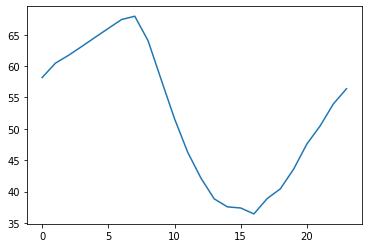

In [ ]:
plt.plot(hour_hum)

In [ ]:
train['hour_bef_humidity'].fillna({934:58.169492,1035:40.450000},inplace = True)

In [ ]:
train.loc[[934,1035],:]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,58.169492,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,40.450000,NaN,NaN,NaN,NaN,1.0


**4. ozone 결측값**

*특이사항 : 결측치 많음*


---
- 결측치가 많아서 영상에선 다루지 않았지만, 상관계수가 높았기 때문에 선정 & 표준편차 (std) 값이 매우 낮았기 때문에 평균치에 몰려있다고 판단 

- 결론적으로, 결측치는 해당 오존 값의 평균값으로 결측치 채움



In [ ]:
train['hour_bef_ozone'].fillna(train['hour_bef_ozone'].mean(),inplace=True)

In [ ]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         2
hour_bef_ozone              0
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

# 3-2. test 데이터 전처리
*train data 처리했던 방식으로 처리함*

*결측치의 개수가 매우 작기 때문에 분석 과정은 생략*

In [ ]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
#temperature
test[test['hour_bef_temperature'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.groupby('hour').mean()['hour_bef_temperature']

hour
0     21.386667
1     20.986667
2     20.600000
3     20.203333
4     19.853333
5     19.634483
6     19.243333
7     19.190000
8     19.846667
9     21.266667
10    22.683333
11    24.110000
12    25.430000
13    26.630000
14    27.473333
15    28.040000
16    28.255172
17    27.848276
18    27.010345
19    26.110345
20    24.803333
21    23.696552
22    22.523333
23    21.926667
Name: hour_bef_temperature, dtype: float64

In [ ]:
test['hour_bef_temperature'].fillna({653:26.110345},inplace = True)

In [ ]:
#windspeed

test[test['hour_bef_windspeed'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,26.110345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.986667
1     1.840000
2     1.823333
3     1.636667
4     1.543333
5     1.589655
6     1.396667
7     1.453333
8     1.446667
9     1.646667
10    1.920000
11    2.186667
12    2.636667
13    2.836667
14    2.903333
15    3.140000
16    3.406897
17    3.558621
18    3.503448
19    3.541379
20    3.406667
21    3.041379
22    2.686667
23    2.336667
Name: hour_bef_windspeed, dtype: float64

In [ ]:
test['hour_bef_windspeed'].fillna({653:3.541379},inplace = True)

In [ ]:
#humidity

test[test['hour_bef_humidity'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,26.110345,NaN,3.541379,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.groupby('hour').mean()['hour_bef_humidity']

hour
0     63.200000
1     65.000000
2     67.266667
3     68.700000
4     69.600000
5     70.034483
6     72.333333
7     71.900000
8     67.700000
9     62.366667
10    57.100000
11    52.366667
12    47.033333
13    42.766667
14    40.566667
15    38.900000
16    40.000000
17    42.689655
18    45.793103
19    47.689655
20    50.566667
21    53.517241
22    59.700000
23    61.900000
Name: hour_bef_humidity, dtype: float64

In [ ]:
test['hour_bef_humidity'].fillna({653:47.689655},inplace=True)

In [ ]:
#ozone

test['hour_bef_ozone'].fillna(test['hour_bef_ozone'].mean(),inplace = True)

In [ ]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        1
hour_bef_ozone             0
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

# 4. 데이터 모델링

*앞에서 불러왔던 랜덤포레스트 이용*

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


전체 데이터를 학습 시키지 않고, count에 영향을 많이 미치는 값만 추려서 학습시킴

In [ ]:
features= ['hour','hour_bef_temperature','hour_bef_windspeed','hour_bef_humidity','hour_bef_ozone']
x_train = train[features]
y_train = train['count']
x_test = test[features]

shape값 : 데이터의 개수

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(1459, 5)
(1459,)
(715, 5)


**! Random Forest 알고리즘 !**

*여러 개의 결정 트리를 임의적으로 학습하는 앙상블의 배깅 유형*

---
- 장점 : 단일 트리 모델 단점 보완(성능, 과대적합)

- 단점 : 대용량 데이터 셋으로 처리시간 증가

---
**하이퍼 파라미터**
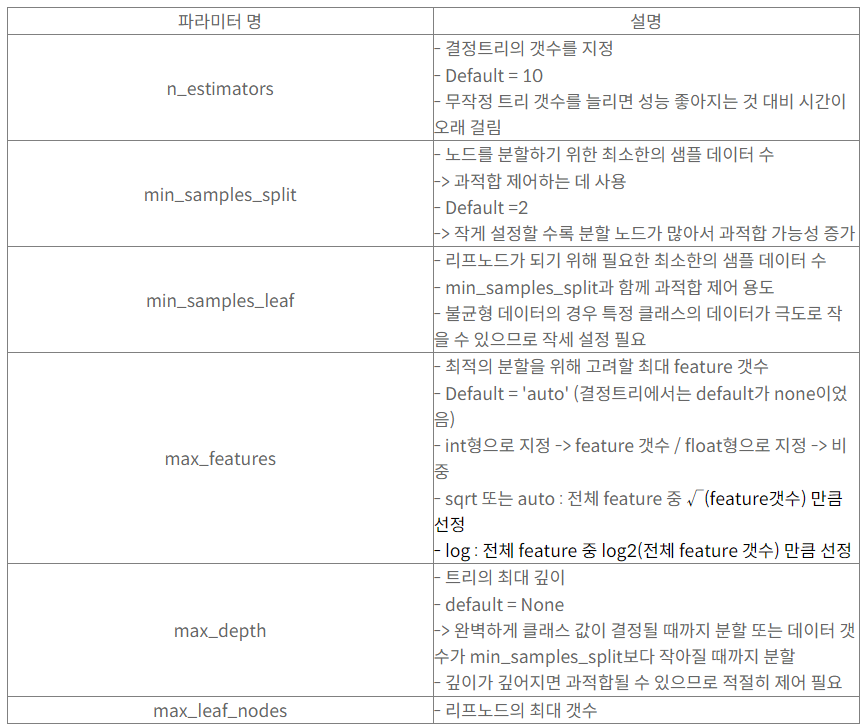

*기본값*

    estimator = RandomForestRegressor(n_estimators=10, bootstrap=True, criterion='mse', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=’auto’)

값을 다르게해서 여러가지 모델을 출력 후 -> 최고 점수 확인

In [ ]:
model100=RandomForestRegressor(n_estimators= 100, random_state = 0)
model100_5=RandomForestRegressor(n_estimators= 100, max_depth = 5, random_state = 0)
model200=RandomForestRegressor(n_estimators= 200, random_state = 0)

In [ ]:
model100.fit(x_train,y_train)
model100_5.fit(x_train,y_train)
model200.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

x_test data 활용해서 predicct

In [ ]:
ypred1 = model100.predict(x_test)
ypred2 = model100_5.predict(x_test)
ypred3 = model200.predict(x_test)

# 5. 최종 데이터 값 출력

In [ ]:
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [ ]:
submission['count']=ypred1
submission.to_csv('model100.csv',index = False)

In [ ]:
submission['count']=ypred2
submission.to_csv('model100_5.csv',index = False)

In [ ]:
submission['count']=ypred3
submission.to_csv('model200.csv',index = False)